In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime


In [2]:
%matplotlib inline                          
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

savefig = 1

In [3]:
file = r"C:\Users\rolte\Documents\GitHub\satellite_python_2022v2\Data\IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE_1641567446094.nc"

In [4]:
ds = xr.open_dataset(file)             #dataset

In [5]:
ds                         #open the dataset

<xarray.Dataset>
Dimensions:                              (time: 1, lat: 1600, lon: 3600)
Coordinates:
  * time                                 (time) datetime64[ns] 2022-01-06
  * lat                                  (lat) float32 -79.95 -79.85 ... 79.95
  * lon                                  (lon) float32 -179.9 -179.9 ... 179.9
Data variables: (12/15)
    adjusted_sea_surface_temperature     (time, lat, lon) float32 ...
    sses_standard_deviation              (time, lat, lon) float32 ...
    or_latitude                          (time, lat, lon) float32 ...
    standard_deviation_to_reference_sst  (time, lat, lon) float32 ...
    bias_to_reference_sst                (time, lat, lon) float32 ...
    sea_surface_temperature              (time, lat, lon) float32 ...
    ...                                   ...
    solar_zenith_angle                   (time, lat, lon) float32 ...
    quality_level                        (time, lat, lon) float32 ...
    satellite_zenith_angle               (time, lat, lon) float32 ...
    adjusted_standard_deviation_error    (time, lat, lon) float32 ...
    sources_of_sst                       (time, lat, lon) float32 ...
    or_longitude                         (time, lat, lon) float32 ...
Attributes: (12/70)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    standard_name_vocabulary:        NCDF Climate and Forecast (CF) Metadata ...
    naming_authority:                org.ghrsst
    netcdf_version_id:               4.6.1 of Sep  8 2018 17:21:01 $
    title:                           Merged collation of sea surface temperat...
    id:                              IFR-L3S-GLOB-ODYSSEA
    ...                              ...
    date_metadata_modified:          2019-02-01T00:00:00
    history:                         collated data file originally produced b...
    uuid:                            e721794d-584b-459e-927f-69c9542180ff
    file_quality_level:              3
    comment:                         WARNING:Some applications are unable to ...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [6]:
ds.lat

<xarray.DataArray 'lat' (lat: 1600)>
array([-79.95, -79.85, -79.75, ...,  79.75,  79.85,  79.95], dtype=float32)
Coordinates:
  * lat      (lat) float32 -79.95 -79.85 -79.75 -79.65 ... 79.75 79.85 79.95
Attributes:
    long_name:            latitude
    units:                degrees_north
    standard_name:        latitude
    axis:                 Y
    _ChunkSizes:          1600
    _CoordinateAxisType:  Lat

In [7]:
ds.lon

<xarray.DataArray 'lon' (lon: 3600)>
array([-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    standard_name:        longitude
    axis:                 X
    long_name:            longitude
    units:                degrees_east
    _ChunkSizes:          3600
    _CoordinateAxisType:  Lon

In [8]:
sst = ds.sea_surface_temperature -273.15

C:\Users\rolte\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\rolte\AppData\Local\Temp/ipykernel_2352/990681231.py:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022,extend='both')


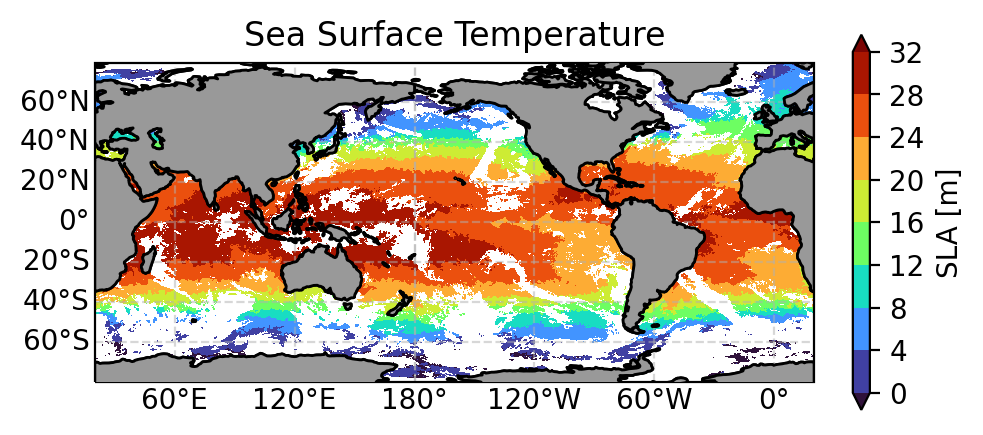

In [9]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Sea Surface Temperature')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                               #creating a directory for the image
    plt.savefig(__figdir__+'SLA.'+plotfiletype,**savefig_args)               

In [10]:
__figdir__+'SLA.'+plotfiletype+'ocean'

'../plots/SMODE_SLA.pngocean'